In [6]:
import numpy as np

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state=0)

In [8]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {"svm__C": 10.0 ** np.arange(-3, 2),
              "svm__gamma": 10.0 ** np.arange(-3, 2)}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: ", grid.best_score_)
print("Test set score: ", grid.score(X_test, y_test))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy:  0.9812311901504789
Test set score:  0.972027972027972
Best parameters:  {'svm__C': 1.0, 'svm__gamma': 1.0}


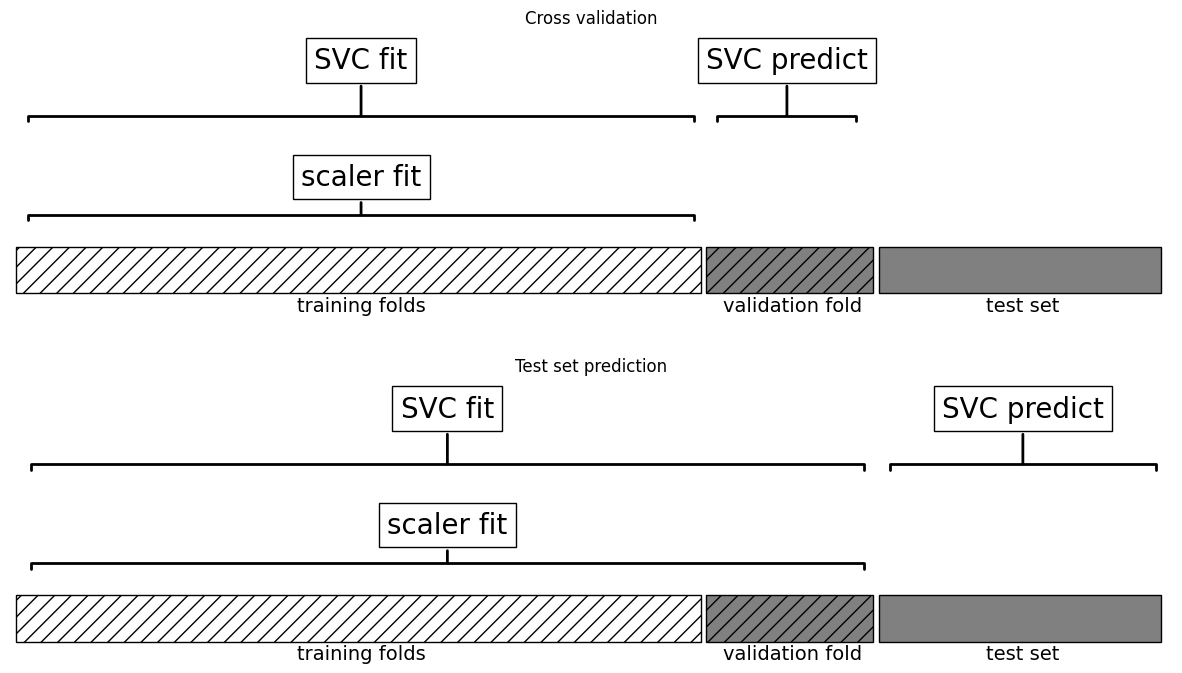

In [9]:
import mglearn
mglearn.plots.plot_proper_processing()

In [20]:
from sklearn.feature_selection import SelectPercentile, f_regression

rnd = np.random.RandomState(seed=0)

# データセットX, yはお互いに関係ないデータである
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)

print("X_selected.shape: ", X_selected.shape)

X_selected.shape:  (100, 500)


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

print("Cross-validation accuracy(cv only on ridge): ", np.mean(cross_val_score(Ridge(), X_selected, y, cv=5)))

Cross-validation accuracy(cv only on ridge):  0.9057953065239822


In [22]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, percentile=5)), ("ridge", Ridge())])

print("Cross-validation accuracy (pipeline): ", np.mean(cross_val_score(pipe, X, y, cv=5)))

Cross-validation accuracy (pipeline):  -0.2465542238495281
